In [11]:
import pandas as pd
import matplotlib.pyplot as plt

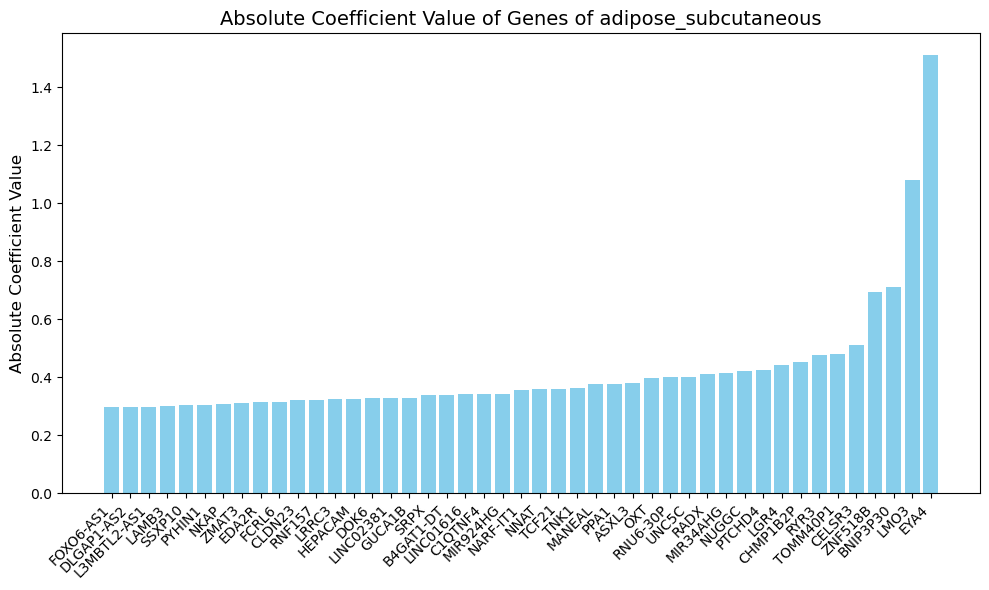

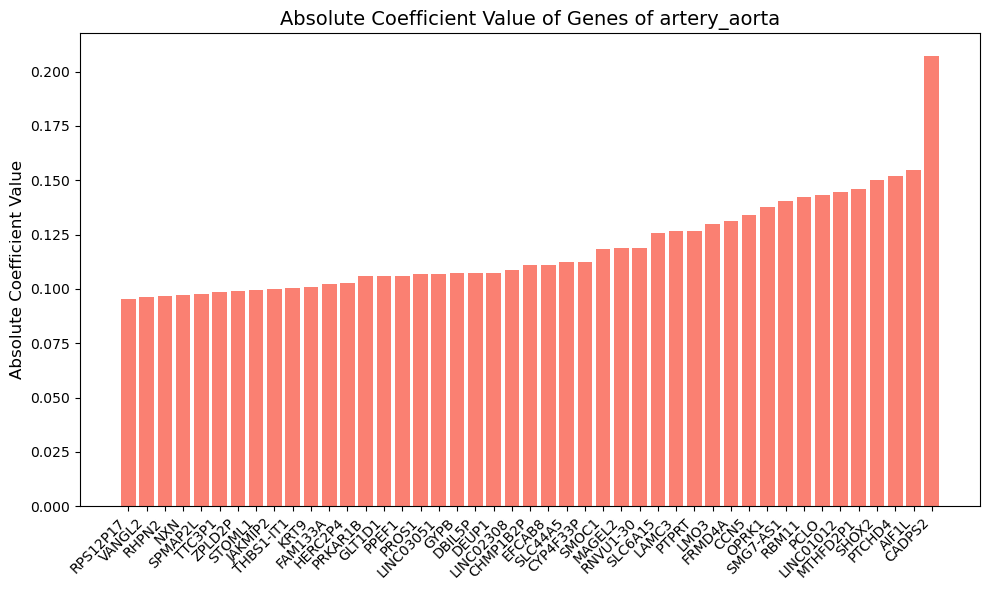

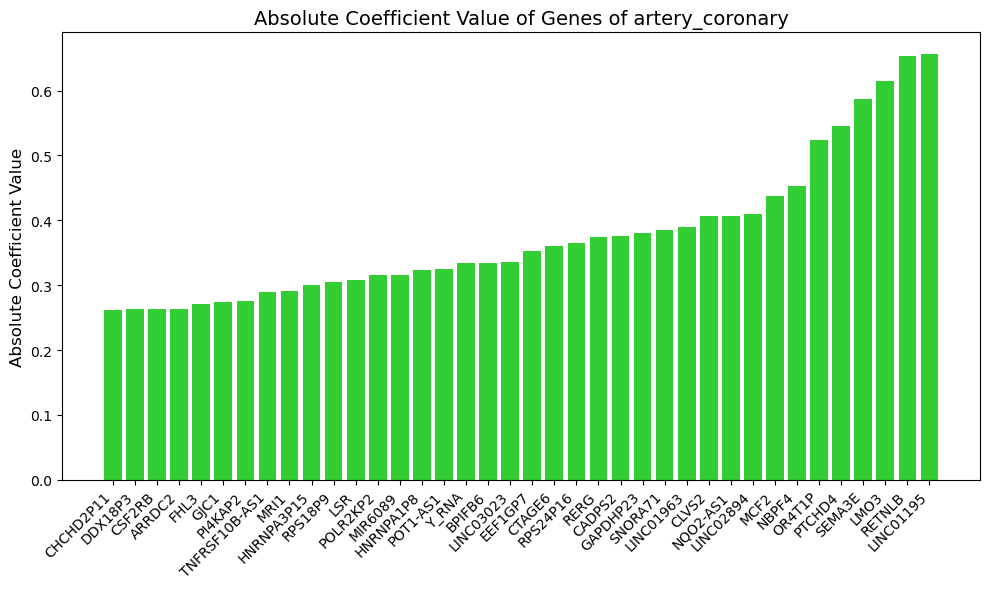

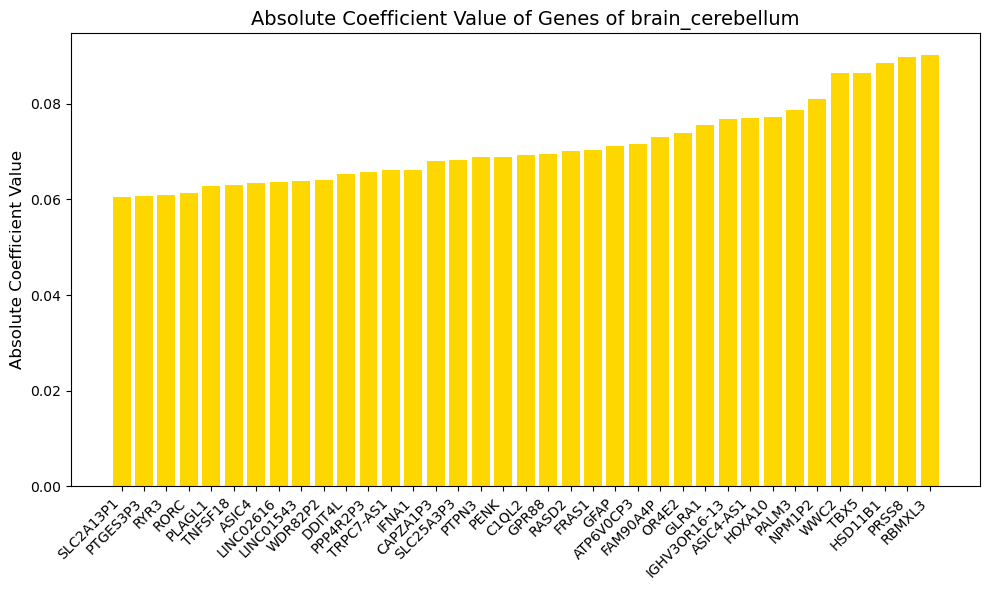

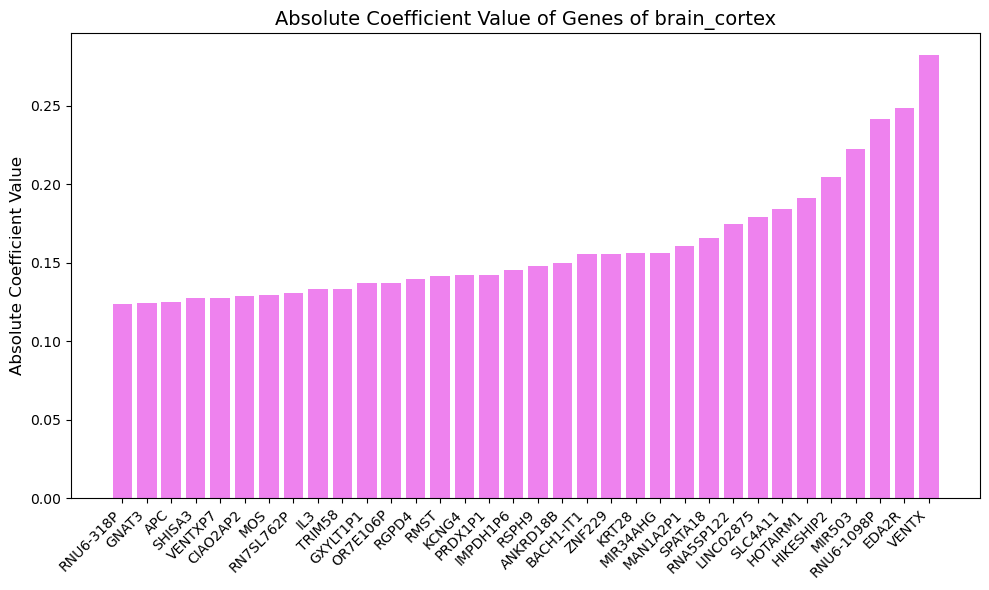

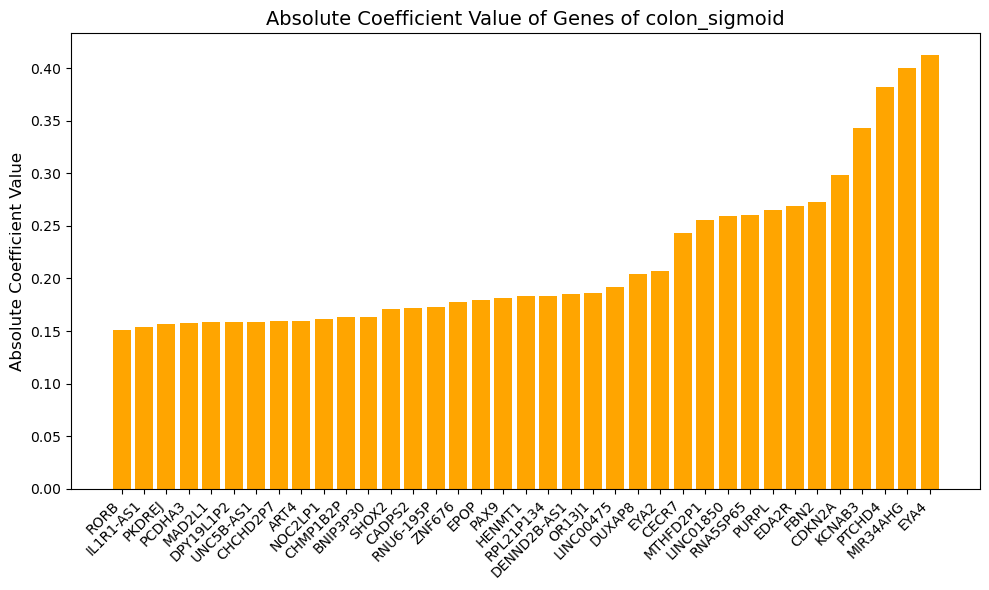

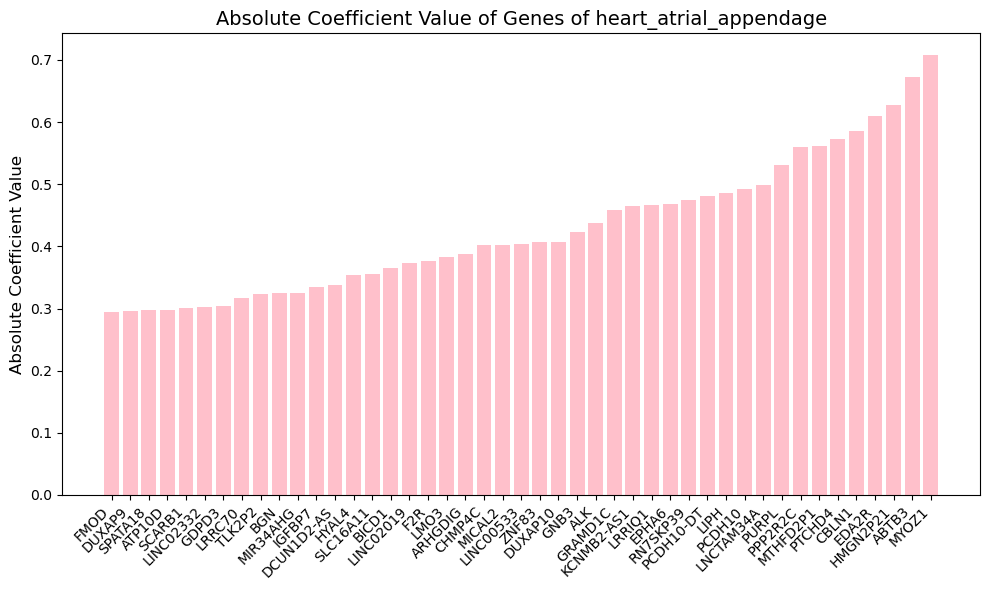

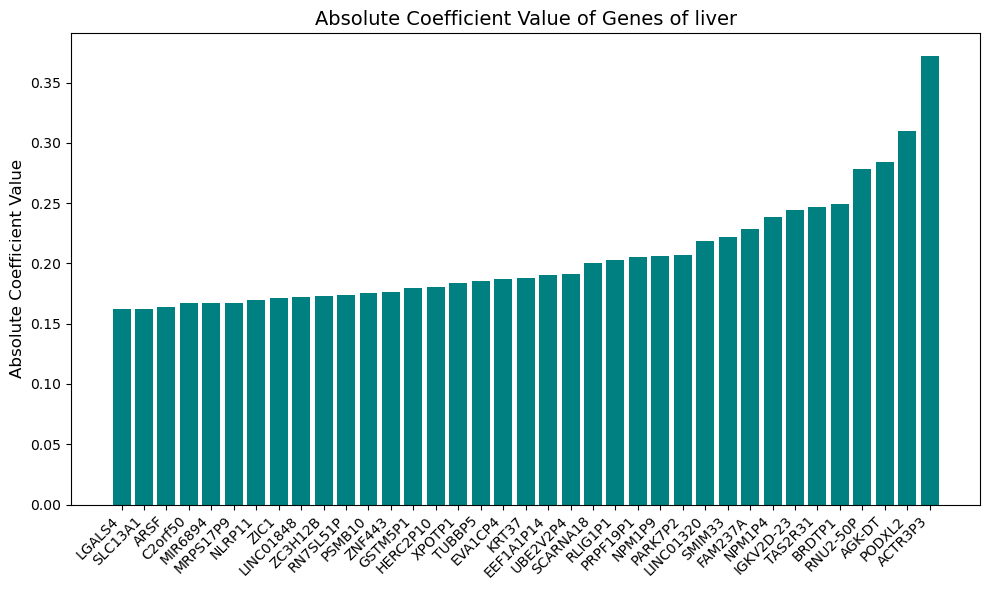

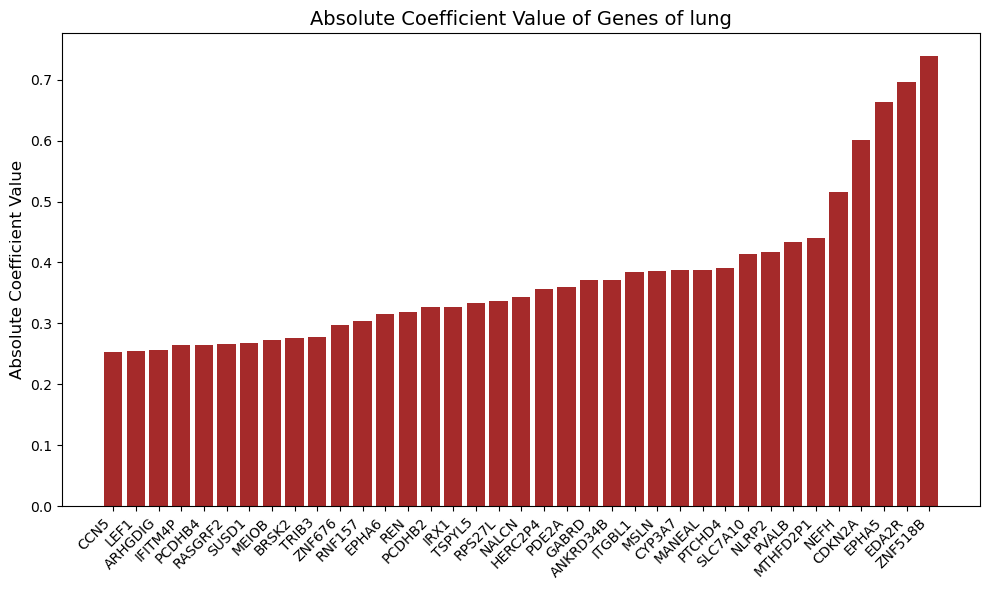

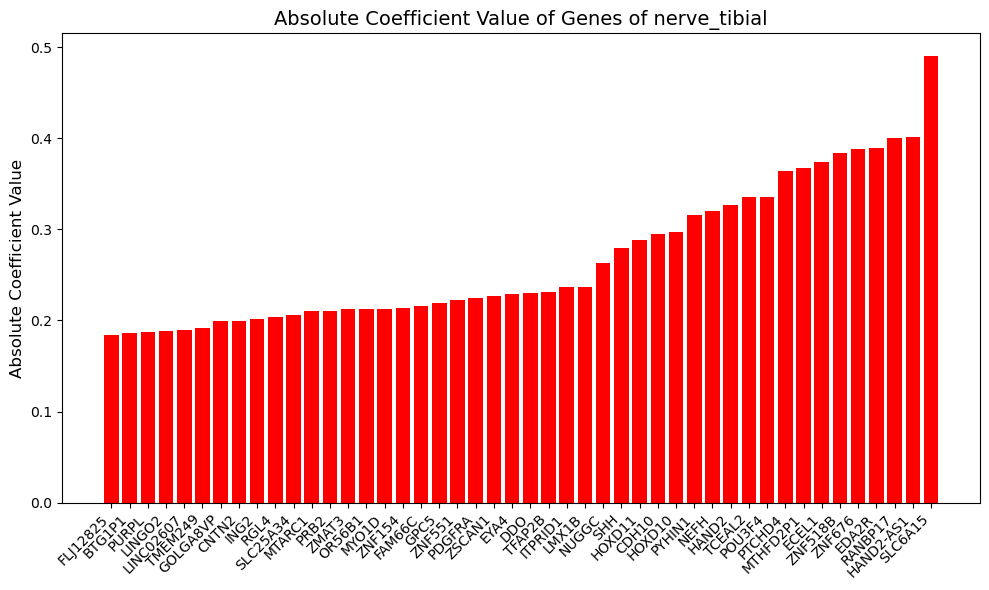

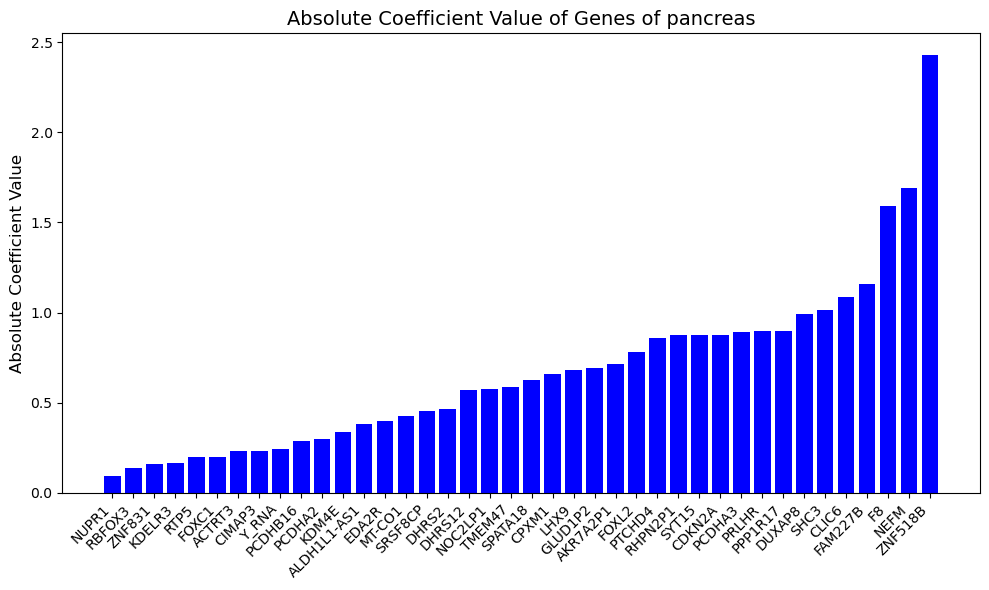

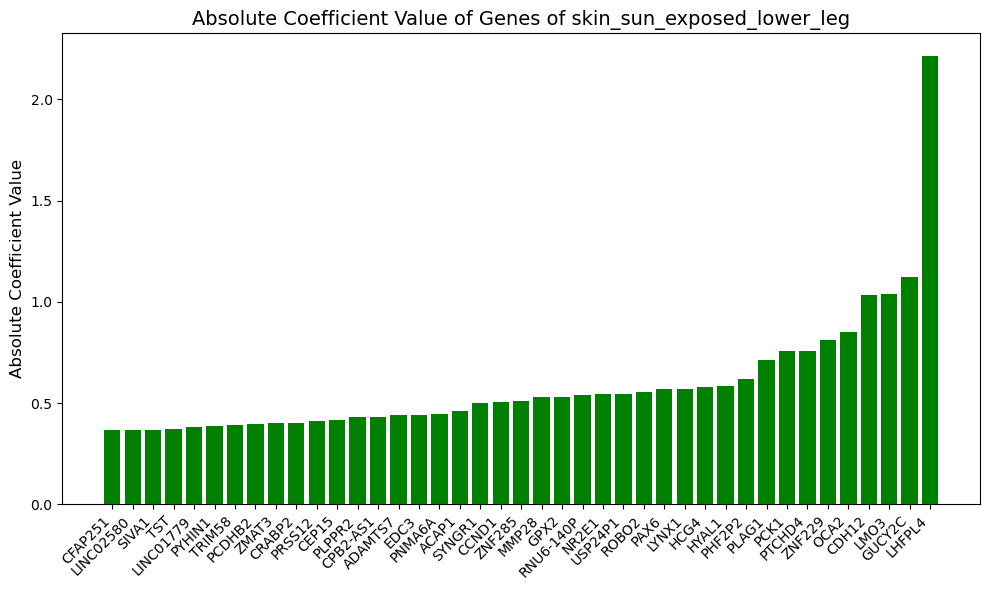

In [12]:
organs = ["adipose_subcutaneous","artery_aorta","artery_coronary","brain_cerebellum","brain_cortex","colon_sigmoid","heart_atrial_appendage","liver","lung","nerve_tibial","pancreas","skin_sun_exposed_lower_leg"]
color_palette = ['skyblue', 'salmon', 'limegreen', 'gold', 'violet', 'orange', 'pink', 'teal', 'brown', 'red', 'blue', 'green']

for i,organ in enumerate(organs):
    df = pd.read_csv(f"TSVs/coeff50_pls_{organ}_redc20p_train_bs20_cmn204201_lpo.tsv", sep="\t",header=0, names=["Ensembl_ID", "Coef", "Gene_name"])
    df = df[df["Gene_name"] != "Gene symbol not found"]
    df = df.dropna()
    df['Gene_name'] = df['Gene_name'].astype(str)
    df['Abs_Coef'] = df['Coef'].abs()
    df = df.sort_values(by='Abs_Coef')
    plt.figure(figsize=(10, 6))
    bar_color = color_palette[i % len(color_palette)]
    plt.bar(df['Gene_name'], df['Abs_Coef'], color=bar_color)
    plt.ylabel('Absolute Coefficient Value', fontsize=12)
    plt.title(f"Absolute Coefficient Value of Genes of {organ}", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.savefig(f"plots/abs_coef_{organ}.png")
    plt.show()
    plt.close()